In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sn

In [3]:
# read data

Data=pd.read_csv("..\\CSV files\\framingham.csv")

In [4]:
Data.shape

(4240, 16)

In [5]:
Data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
Data.drop(['education'],axis=1,inplace =True)

In [7]:
Data.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
Data.dropna(axis=0,inplace=True)

In [9]:
Data.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [10]:
Data

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [11]:
X=Data[['age','male','cigsPerDay','totChol','sysBP','glucose']]
Y=Data["TenYearCHD"]

In [12]:
X

,age,male,cigsPerDay,totChol,sysBP,glucose
0,39,1,0.0,195.0,106.0,77.0
1,46,0,0.0,250.0,121.0,76.0
2,48,1,20.0,245.0,127.5,70.0
3,61,0,30.0,225.0,150.0,103.0
4,46,0,23.0,285.0,130.0,85.0
...,...,...,...,...,...,...
4233,50,1,1.0,313.0,179.0,86.0
4234,51,1,43.0,207.0,126.5,68.0
4237,52,0,0.0,269.0,133.5,107.0
4238,40,1,0.0,185.0,141.0,72.0


In [13]:
Y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 3751, dtype: int64

In [14]:
X=preprocessing.StandardScaler().fit(X).transform(X)

In [15]:
(X_train,X_test,Y_train,Y_test)=train_test_split(X,Y,test_size=0.2,random_state=5)

In [16]:
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
Y_predict=log_reg.predict(X_test)

In [17]:
accuracy=accuracy_score(Y_predict,Y_test)

In [18]:
accuracy*100

87.48335552596538

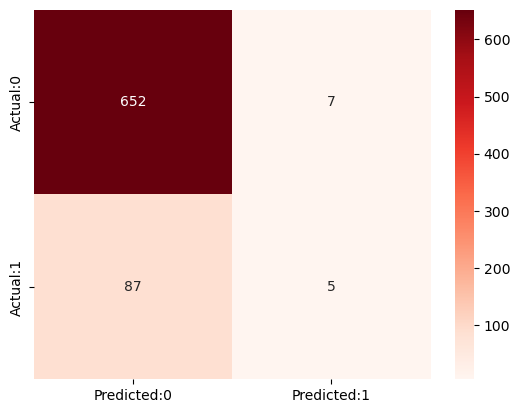

<Figure size 600x600 with 0 Axes>

In [22]:
confu_matrix=confusion_matrix(Y_test,Y_predict)
conf_mat_data=pd.DataFrame(data=confu_matrix,columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])
sn.heatmap(conf_mat_data,annot=True,fmt='d',cmap='Reds')
plt.figure(figsize=(6,6))
plt.show()

In [20]:
report=classification_report(Y_test,Y_predict)

In [21]:
print(report)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       659
           1       0.42      0.05      0.10        92

    accuracy                           0.87       751
   macro avg       0.65      0.52      0.51       751
weighted avg       0.83      0.87      0.83       751

